In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import files.dataset_load as dataset
import files.dataset_encode as encoder

/Users/komputer/Py/ML/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Загрузка датасета
results, shootouts, goalscorers, former_names = dataset.load_fill_na()

`former_names.csv` по моему мнению не содержит данных влияющих на предсказание, так как во всех файлах, используются актуальные имена команд.

In [3]:
results.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [4]:
shootouts.isna().sum()

date             0
home_team        0
away_team        0
winner           0
first_shooter    0
dtype: int64

In [5]:
goalscorers.isna().sum()

date         0
home_team    0
away_team    0
team         0
scorer       0
minute       0
own_goal     0
penalty      0
dtype: int64

In [6]:
former_names.isna().sum()

current       0
former        0
start_date    0
end_date      0
dtype: int64

In [7]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48366 entries, 0 to 48365
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        48366 non-null  datetime64[ns]
 1   home_team   48366 non-null  category      
 2   away_team   48366 non-null  category      
 3   home_score  48366 non-null  int32         
 4   away_score  48366 non-null  int32         
 5   tournament  48366 non-null  category      
 6   city        48366 non-null  category      
 7   country     48366 non-null  category      
 8   neutral     48366 non-null  bool          
dtypes: bool(1), category(5), datetime64[ns](1), int32(2)
memory usage: 1.4 MB


In [8]:
shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           650 non-null    datetime64[ns]
 1   home_team      650 non-null    category      
 2   away_team      650 non-null    category      
 3   winner         650 non-null    category      
 4   first_shooter  650 non-null    category      
dtypes: category(4), datetime64[ns](1)
memory usage: 32.2 KB


In [9]:
goalscorers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44447 entries, 0 to 44446
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       44447 non-null  datetime64[ns]
 1   home_team  44447 non-null  category      
 2   away_team  44447 non-null  category      
 3   team       44447 non-null  category      
 4   scorer     44447 non-null  category      
 5   minute     44447 non-null  int32         
 6   own_goal   44447 non-null  bool          
 7   penalty    44447 non-null  bool          
dtypes: bool(2), category(4), datetime64[ns](1), int32(1)
memory usage: 1.6 MB


In [10]:
# Dataset info
teams = pd.concat([results["home_team"], results["away_team"]], ignore_index=True)

count_teams = len(teams.unique())
count_tournaments = len(results["tournament"].unique())
count_cities = len(results["city"].unique())
count_countries = len(results["country"].unique())

print(count_teams, count_tournaments, count_cities, count_countries)

332 184 2106 268


In [11]:
dataset.calculate_teams_stats(results, shootouts)

,avg_goals,win_rate,num_matches,num_shootouts,shootouts_win_rate
Scotland,1.703924,0.473246,841,2,1.000000
England,2.182407,0.575000,1080,12,0.333333
Wales,1.250000,0.322626,716,1,0.000000
Northern Ireland,1.048780,0.261119,697,1,1.000000
United States,1.515385,0.451282,780,10,0.600000
...,...,...,...,...,...
Crimea,1.400000,0.600000,5,0,0.000000
Two Sicilies,0.500000,0.166667,6,0,0.000000
Cilento,0.000000,0.000000,1,0,0.000000
Surrey,3.000000,1.000000,1,0,0.000000


In [12]:
test_size = 0.2

dates = sorted(results["date"].unique())
split_idx = int(len(dates) * (1 - test_size))
train_dates = dates[:split_idx]
test_dates = dates[split_idx:]

train_results = results[results["date"].isin(train_dates)]
test_results = results[results["date"].isin(test_dates)]

train_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
29777,2006-02-01,Thailand,Jordan,0,0,Friendly,Ayutthaya,Thailand,False
29778,2006-02-03,Egypt,DR Congo,4,1,African Cup of Nations,Cairo,Egypt,False
29779,2006-02-03,Guinea,Senegal,2,3,African Cup of Nations,Alexandria,Egypt,True
29780,2006-02-04,Cameroon,Ivory Coast,1,1,African Cup of Nations,Cairo,Egypt,True


In [13]:
test_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
29782,2006-02-06,Oman,Singapore,1,0,Friendly,Doha,Qatar,True
29783,2006-02-07,Egypt,Senegal,2,1,African Cup of Nations,Cairo,Egypt,False
29784,2006-02-07,Kuwait,Jordan,2,1,Friendly,Kuwait City,Kuwait,False
29785,2006-02-07,Nigeria,Ivory Coast,0,1,African Cup of Nations,Alexandria,Egypt,True
29786,2006-02-07,Syria,Palestine,3,0,Friendly,Aleppo,Syria,False
...,...,...,...,...,...,...,...,...,...
48361,2025-06-29,Canada,Guatemala,1,1,Gold Cup,Minneapolis,United States,True
48362,2025-06-29,United States,Costa Rica,2,2,Gold Cup,Minneapolis,United States,False
48363,2025-07-02,United States,Guatemala,2,1,Gold Cup,St. Louis,United States,False
48364,2025-07-02,Mexico,Honduras,1,0,Gold Cup,Santa Clara,United States,True


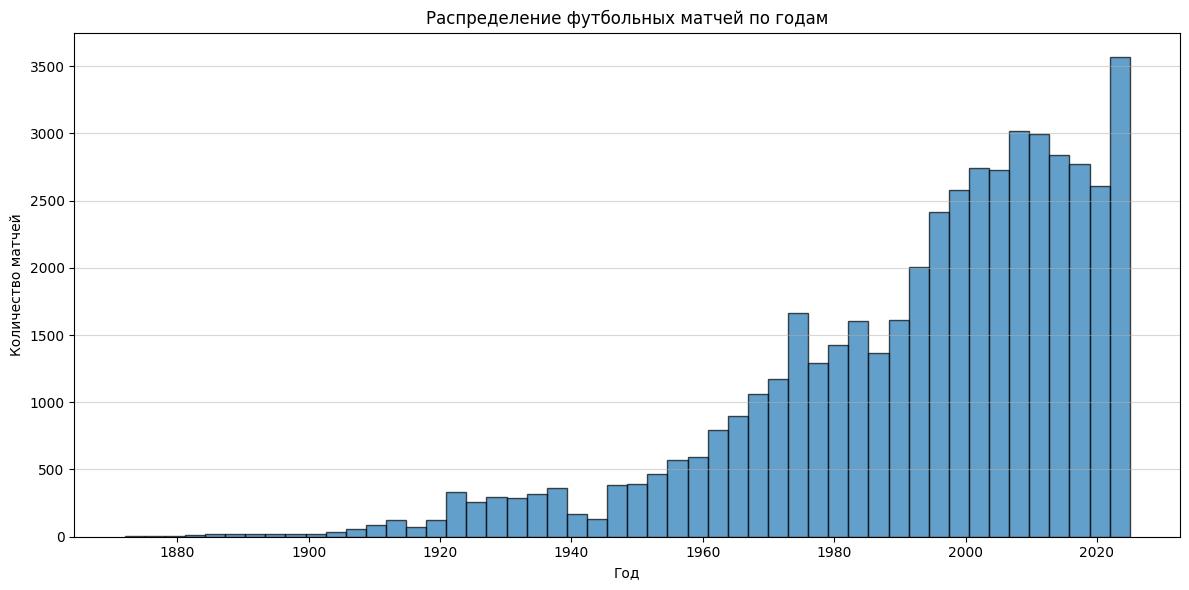

In [14]:
# Гистограмма количества матчей по годам
years = results["date"].dt.year
plt.figure(figsize=(12, 6))
plt.hist(years, bins=50, edgecolor="black", alpha=0.7)
plt.title("Распределение футбольных матчей по годам")
plt.xlabel("Год")
plt.ylabel("Количество матчей")
plt.grid(axis="y", alpha=0.5)
plt.tight_layout()
plt.show()

### Анализ goalscorers

<Axes: title={'center': 'Количество голов по минутам'}, ylabel='Frequency'>

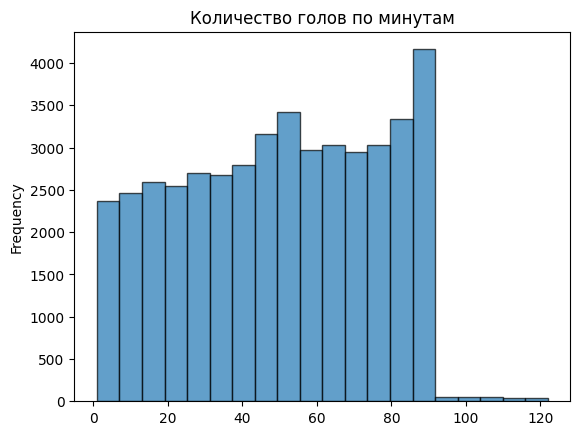

In [15]:
# Гистограмма количества голов по минутам
goalscorers["minute"].plot.hist(
    bins=20, edgecolor="black", alpha=0.7, title="Количество голов по минутам"
)

<Axes: >

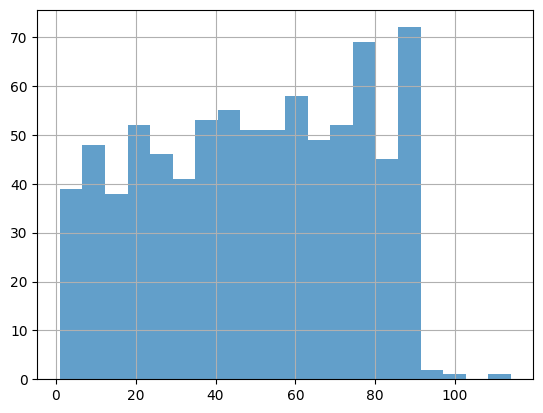

In [16]:
# Гистограмма количества голов, забитых в свои ворота по минутам
goalscorers[goalscorers["own_goal"]]["minute"].hist(bins=20, alpha=0.7)

<Axes: xlabel='penalty'>

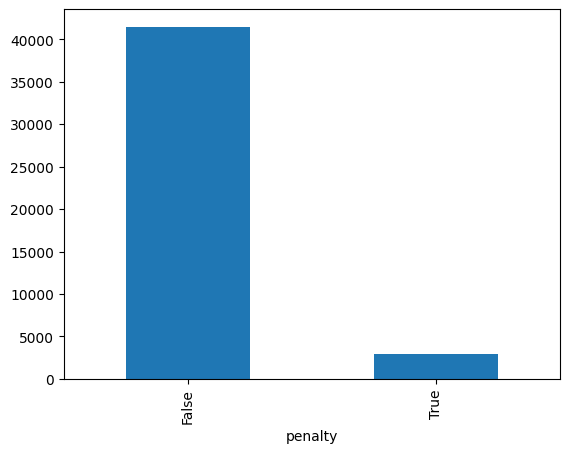

In [17]:
# Голы забитые на пенальти
goalscorers["penalty"].value_counts().plot.bar()

### Анализ results

<Axes: >

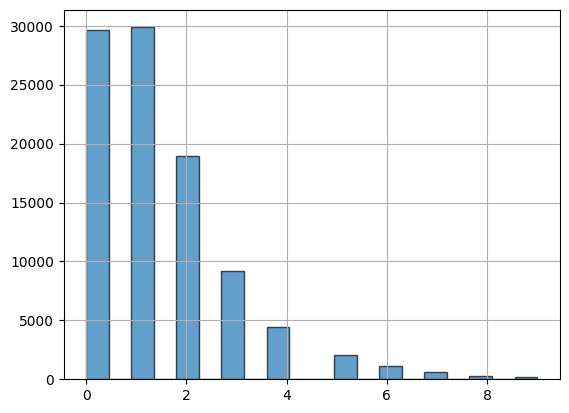

In [18]:
# Гистограмма количества забитых голов
goals = pd.concat([results["home_score"], results["away_score"]], ignore_index=True)
goals[goals < 10].hist(bins=20, alpha=0.7, edgecolor="black")

<Axes: title={'center': 'Турниры с наибольшим количеством матчей'}, xlabel='tournament'>

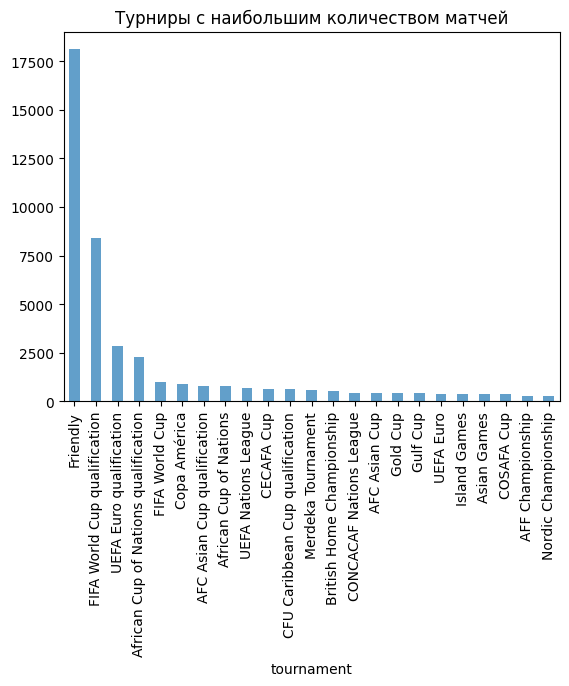

In [19]:
# Гистограмма количества матчей по турнирам
tournaments = results["tournament"].value_counts()
tournaments[tournaments > tournaments.mean()].plot.bar(
    alpha=0.7, title="Турниры с наибольшим количеством матчей"
)

<Axes: title={'center': 'Города с наибольшим количеством матчей'}, xlabel='city'>

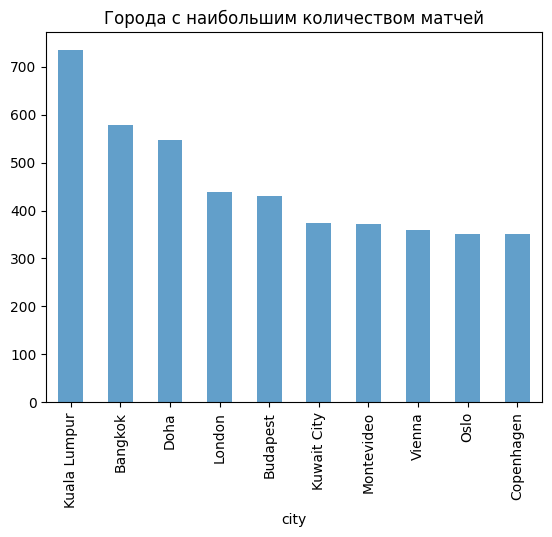

In [20]:
# Гистограмма количества матчей по городам
cities = results["city"].value_counts()
cities.sort_values(ascending=False).head(10).plot.bar(
    alpha=0.7, title="Города с наибольшим количеством матчей"
)

<Axes: title={'center': 'Команды с наибольшим количеством матчей'}>

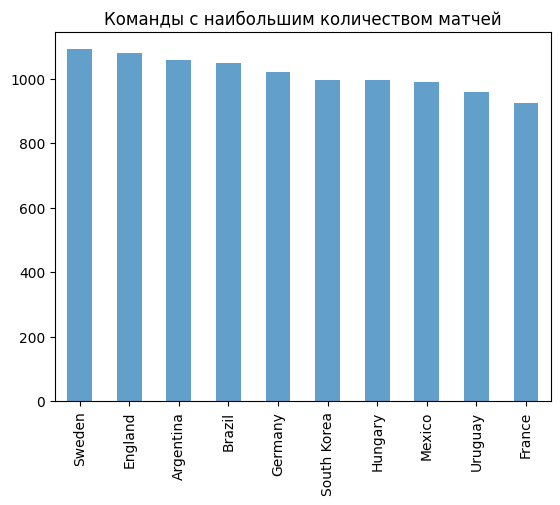

In [21]:
# Гистограмма количества матчей по командам
teams = pd.concat([results["home_team"], results["away_team"]], ignore_index=True)
teams.value_counts().sort_values(ascending=False).head(10).plot.bar(
    alpha=0.7, title="Команды с наибольшим количеством матчей"
)

<Axes: title={'center': 'Страны с наибольшим количеством матчей'}, xlabel='country'>

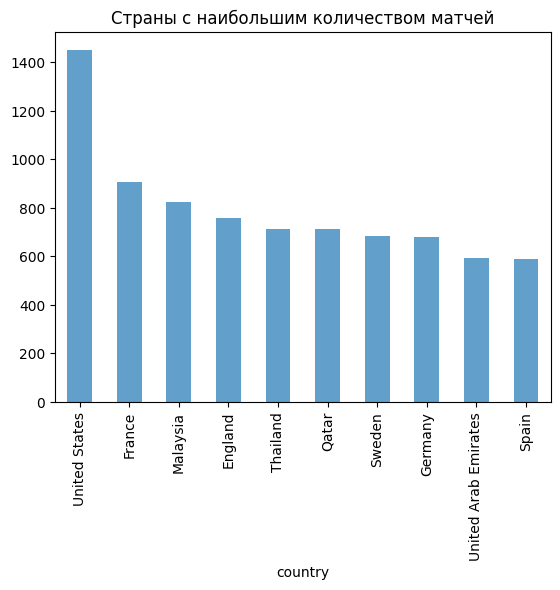

In [22]:
# Гистограмма количества матчей по странам
countries = results["country"].value_counts()
countries.sort_values(ascending=False).head(10).plot.bar(
    alpha=0.7, title="Страны с наибольшим количеством матчей"
)

<Axes: title={'center': 'Матч на нейтральной территории'}, xlabel='neutral'>

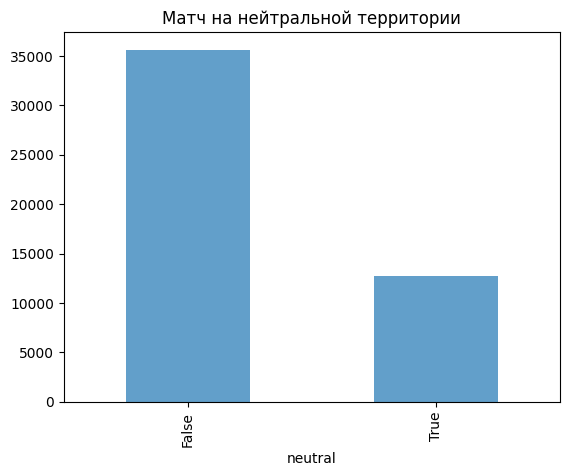

In [23]:
# Гистограмма матчей на нейтральной территории
results["neutral"].value_counts().plot.bar(alpha=0.7, title="Матч на нейтральной территории")

/var/folders/j3/hq92td793mvf24x3hy7xmpvw0000gn/T/ipykernel_7735/161670078.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["date", "home_team", "away_team"])


<Axes: title={'center': 'Время забитого первого гола'}, ylabel='Frequency'>

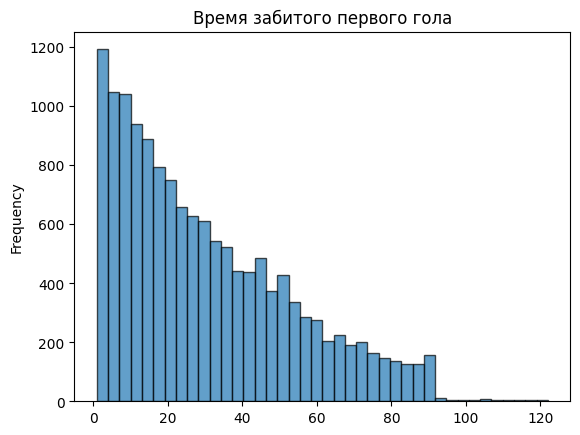

In [24]:
# Распределение первых забитых голов
first_goals = (
    goalscorers.sort_values(["date", "home_team", "away_team", "minute"])
    .groupby(["date", "home_team", "away_team"])
    .head(1)
)
first_goals["minute"].plot.hist(
    alpha=0.7, bins=40, edgecolor="black", title="Время забитого первого гола"
)

In [25]:
encoded_results, encoded_shootouts, encoded_goalscorers, encoded_former_names = (
    encoder.encode_columns(results, shootouts, goalscorers, former_names)
)

encoded_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day
0,1872-11-30,253,91,0,0,89,663,204,0,0,11,30
1,1873-03-08,91,253,4,2,89,1045,71,0,1,3,8
2,1874-03-07,253,91,2,1,89,663,204,0,2,3,7
3,1875-03-06,91,253,2,2,89,1045,71,0,3,3,6
4,1876-03-04,253,91,3,0,89,663,204,0,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
48361,2025-06-29,49,121,1,1,91,1177,248,1,153,6,29
48362,2025-06-29,307,69,2,2,91,1177,248,0,153,6,29
48363,2025-07-02,307,121,2,1,91,1767,248,0,153,7,2
48364,2025-07-02,184,130,1,0,91,1659,248,1,153,7,2


In [26]:
encoded_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48366 entries, 0 to 48365
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        48366 non-null  datetime64[ns]
 1   home_team   48366 non-null  int16         
 2   away_team   48366 non-null  int16         
 3   home_score  48366 non-null  int8          
 4   away_score  48366 non-null  int8          
 5   tournament  48366 non-null  int16         
 6   city        48366 non-null  int16         
 7   country     48366 non-null  int16         
 8   neutral     48366 non-null  int8          
 9   year        48366 non-null  int16         
 10  month       48366 non-null  int8          
 11  day         48366 non-null  int8          
dtypes: datetime64[ns](1), int16(6), int8(5)
memory usage: 1.2 MB


In [27]:
encoded_goalscorers

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year,month,day
0,1916-07-02,61,309,309,6858,44,0,0,44,7,2
1,1916-07-02,61,309,309,5730,55,0,0,44,7,2
2,1916-07-02,61,309,309,5730,70,0,0,44,7,2
3,1916-07-02,61,309,309,6858,75,0,0,44,7,2
4,1916-07-06,14,61,14,517,2,0,0,44,7,6
...,...,...,...,...,...,...,...,...,...,...,...
44442,2025-07-02,307,121,307,3121,15,0,0,153,7,2
44443,2025-07-02,307,121,121,10213,80,0,0,153,7,2
44444,2025-07-06,307,184,307,2370,4,0,0,153,7,6
44445,2025-07-06,307,184,184,11178,27,0,0,153,7,6


In [28]:
encoded_goalscorers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44447 entries, 0 to 44446
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       44447 non-null  datetime64[ns]
 1   home_team  44447 non-null  int16         
 2   away_team  44447 non-null  int16         
 3   team       44447 non-null  int16         
 4   scorer     44447 non-null  int16         
 5   minute     44447 non-null  int8          
 6   own_goal   44447 non-null  int8          
 7   penalty    44447 non-null  int8          
 8   year       44447 non-null  int16         
 9   month      44447 non-null  int8          
 10  day        44447 non-null  int8          
dtypes: datetime64[ns](1), int16(5), int8(5)
memory usage: 998.5 KB


In [29]:
encoded_shootouts

,date,home_team,away_team,winner,first_shooter,year,month,day
0,1967-08-22,134,286,286,134,95,8,22
1,1971-11-14,270,315,270,270,99,11,14
2,1972-05-07,270,137,137,270,100,5,7
3,1972-05-17,290,270,270,290,100,5,17
4,1972-05-19,290,47,290,47,100,5,19
...,...,...,...,...,...,...,...,...
645,2024-09-10,47,275,275,47,152,9,10
646,2025-06-08,225,274,225,225,153,6,8
647,2025-06-28,217,130,130,217,153,6,28
648,2025-06-29,49,121,121,49,153,6,29


In [30]:
encoded_shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           650 non-null    datetime64[ns]
 1   home_team      650 non-null    int16         
 2   away_team      650 non-null    int16         
 3   winner         650 non-null    int16         
 4   first_shooter  650 non-null    int16         
 5   year           650 non-null    int16         
 6   month          650 non-null    int8          
 7   day            650 non-null    int8          
dtypes: datetime64[ns](1), int16(5), int8(2)
memory usage: 12.8 KB


In [ ]:
teams = pd.concat([results["home_team"], results["away_team"]], ignore_index=True)
len(teams.unique())

332

In [31]:
concat_results = pd.concat(
    [
        results,
        encoded_results.rename(
            columns={
                "home_team": "home_team_id",
                "away_team": "away_team_id",
                "tournament": "tournament_id",
                "city": "city_id",
                "country": "country_id",
            }
        ).drop(columns=["date", "home_score", "away_score", "neutral"]),
    ],
    axis=1,
)
concat_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_team_id,away_team_id,tournament_id,city_id,country_id,year,month,day
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,253,91,89,663,204,0,11,30
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,91,253,89,1045,71,1,3,8
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,253,91,89,663,204,2,3,7
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,91,253,89,1045,71,3,3,6
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,253,91,89,663,204,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48361,2025-06-29,Canada,Guatemala,1,1,Gold Cup,Minneapolis,United States,True,49,121,91,1177,248,153,6,29
48362,2025-06-29,United States,Costa Rica,2,2,Gold Cup,Minneapolis,United States,False,307,69,91,1177,248,153,6,29
48363,2025-07-02,United States,Guatemala,2,1,Gold Cup,St. Louis,United States,False,307,121,91,1767,248,153,7,2
48364,2025-07-02,Mexico,Honduras,1,0,Gold Cup,Santa Clara,United States,True,184,130,91,1659,248,153,7,2
